"""
Objective: 
- Extract Resting state functional connectivity features: (52 nodes/channels => 52*51/2) 1326 edges

Input: Subject, Channel, TimeSamplePoint, HbType

Output: [TemporalFeatures, SpatialFeatures] 
    TemporalFeatures Subject x (Channel x Features)(52*10)

Requirement: 
    index_start: datapoint of Acitvating-Task start
        For example: you have 1250 datapoint with the sampling rate of 10Hz. The task starts at 10s. So you index_start would be 100=10s*10Hz
    index_end: datapoint of Acitvating-Task end

Ref: Duan, Lian, et al. "Intrinsic organization of cortical networks predicts state anxiety: an functional near-infrared spectroscopy (fNIRS) study." Translational psychiatry 10.1 (2020): 402.
"""

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [23]:

# save_feature_path = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/data_for_reproducing_model/duan_rsfc/data'
save_feature_path = '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/data_for_reproducing_model/duan_rsfc/raw_data'


# hbo_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/correct_channel_data.npy')
hbo_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/raw_data.npy')

hbo_data = np.transpose(hbo_data, (0,2,1))
# hbr_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbR-All-HC-MDD/correct_channel_data.npy')
hbr_data = np.load('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbR-All-HC-MDD/raw_data.npy')

hbr_data = np.transpose(hbr_data, (0,2,1))
# input = np.random.rand(458, 52, 125)
# please make sure the input data is normalized using something like z-norm
def normalize(data):
    # Iterate over each subject
    normalized_data = np.empty_like(data)
    # Calculate the mean and standard deviation for the current subject
    mean = np.mean(data)
    std = np.std(data)

    # Perform z-normalization for the current subject
    normalized_data= (data - mean) / std
    return normalized_data


input = normalize(np.concatenate((hbo_data[...,np.newaxis],hbr_data[...,np.newaxis]),axis=3))

print(f' input shape -> {input.shape}')
index_start = 10
index_end = 70
task_duration = 60
hbo_type = 0
hbr_type = 1

select_hb_type = hbo_type # if you want to calculate the hbr, change this to hbr_type 

data = input[..., hbo_type]
# compute and derive the resting state period 
print(input.shape)
def compute_resting_state_period(data, index_start, index_end):
    first_resting_data = data[:,:,:index_start] # (458, 52, 10)
    end_resting_data = data[:,:,index_end+10:] # (458, 52, 45)
    resting_data = np.concatenate((first_resting_data, end_resting_data), axis=2) # (458, 52, 55)
    return resting_data


 input shape -> (458, 52, 1701, 2)
(458, 52, 1701, 2)


(458, 52, 1701)
rs_data.shape -> (458, 52, 1631)
dm_data.shape -> (458, 52, 1701)


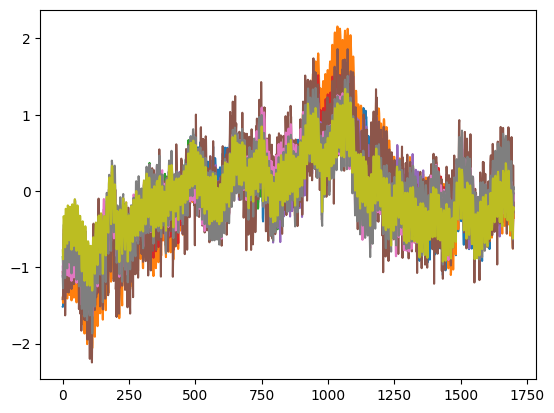

In [24]:
# Posterior superior frontal cortex
left_PSFC_location = ['C9', 'C10', 'C20', 'C21']
right_PSFC_location = ['C1', 'C2', 'C11', 'C12']

# Dorsolateral prefrontal cortex
left_DPC_location = ['C7','C8', 'C17', 'C18', 'C19', 'C28', 'C29']
right_DPC_location = ['C3', 'C4', 'C13', 'C14', 'C15', 'C24', 'C25']

#Superior temporal gyrus
left_STG_location = ['C22', 'C23', 'C32', 'C33', 'C43', 'C44']
right_STG_location = ['C30', 'C31', 'C41', 'C42', 'C51', 'C52']

# Ventrolateral prefrontal cortex
left_VPC_location = ['C34', 'C35', 'C45', 'C46']
right_VPC_location = ['C39', 'C40', 'C49', 'C50']

# Medial prefrontal cortex
MPC_location = ['C5', 'C6', 'C16', 'C26', 'C27', 'C36', 'C37', 'C38', 'C47', 'C48']  

region_location = [left_PSFC_location, right_PSFC_location, left_DPC_location, right_DPC_location, left_STG_location, right_STG_location, left_VPC_location, right_VPC_location, MPC_location]
input_hb_data = data
print(input_hb_data.shape)
region_hb_data = np.zeros((input_hb_data.shape[0], len(region_location), input_hb_data.shape[2]))

plt.figure()
for i, val in enumerate(region_location):
    ch = [ int(ch[1:])-1 for ch in val]
    h = np.mean(input_hb_data[:,ch,:], axis=1)
    region_hb_data[:,i,:] = h
    
for i in range(9):
    plt.plot(region_hb_data[4,i,:])

rs_data = compute_resting_state_period(input_hb_data, index_start, index_end)
dm_data = input_hb_data

region_based_rs_data = compute_resting_state_period(region_hb_data, index_start, index_end)
region_based_dm_data = region_hb_data 
print(f'rs_data.shape -> {rs_data.shape}')
print(f'dm_data.shape -> {dm_data.shape}')

In [4]:
# Calculate the Pearson correlation 


# Define a function to compute the Pearson's correlation coefficient
def compute_correlation(x, y):
    corr, _ = stats.pearsonr(x, y)
    return corr


# feature_shape = rs_data.shape 
# rsfc = np.zeros((rs_data.shape[0], rs_data.shape[1], rs_data.shape[1]))
# for sub in range(feature_shape[0]):
#     for ch_1 in range(feature_shape[1]):
#         for ch_2 in range(feature_shape[1]):
#             if ch_2 < ch_1: continue
#             corr = compute_correlation(
#                 rs_data[sub, ch_1],rs_data[sub, ch_2])
#             rsfc[sub, ch_1, ch_2] = corr
#             rsfc[sub, ch_2, ch_1] = corr
# print(rsfc.shape)

feature_shape = rs_data.shape # accidental findings 
feature_shape = dm_data.shape 
dmfc = np.zeros((dm_data.shape[0], dm_data.shape[1], dm_data.shape[1]))
for sub in range(feature_shape[0]):
    for ch_1 in range(feature_shape[1]):
        for ch_2 in range(feature_shape[1]):
            if ch_2 < ch_1: continue
            corr = compute_correlation(
                dm_data[sub, ch_1],dm_data[sub, ch_2])
            dmfc[sub, ch_1, ch_2] = corr
            dmfc[sub, ch_2, ch_1] = corr
print(dmfc.shape)

# feature_shape = region_based_rs_data.shape 
# region_based_rsfc = np.zeros((region_based_rs_data.shape[0], region_based_rs_data.shape[1], region_based_rs_data.shape[1]))
# for sub in range(feature_shape[0]):
#     for ch_1 in range(feature_shape[1]):
#         for ch_2 in range(feature_shape[1]):
#             if ch_2 < ch_1: continue
#             corr = compute_correlation(
#                 region_based_rs_data[sub, ch_1],region_based_rs_data[sub, ch_2])
#             region_based_rsfc[sub, ch_1, ch_2] = corr
#             region_based_rsfc[sub, ch_2, ch_1] = corr
# print(f'region_based_rsfc.shape -> {region_based_rsfc.shape}')

# feature_shape = region_based_dm_data.shape 
# region_based_dmfc = np.zeros((region_based_dm_data.shape[0], region_based_dm_data.shape[1], region_based_dm_data.shape[1]))
# for sub in range(feature_shape[0]):
#     for ch_1 in range(feature_shape[1]):
#         for ch_2 in range(feature_shape[1]):
#             if ch_2 < ch_1: continue
#             corr = compute_correlation(
#                 region_based_dm_data[sub, ch_1],region_based_dm_data[sub, ch_2])
#             region_based_dmfc[sub, ch_1, ch_2] = corr
#             region_based_dmfc[sub, ch_2, ch_1] = corr
# print(f'region_based_dmfc.shape -> {region_based_dmfc.shape}')

# region_based_dm

# np.save('/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/data_for_reproducing_model/duan_rsfc/rsfc', rsfc)

/Users/shanxiafeng/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


(458, 52, 52)


In [ ]:
for sub in range(10):
    plt.figure()
    plt.imshow(dmfc[sub])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

dmfc = np.nan_to_num(dmfc)
# region_based_rsfc = np.nan_to_num(region_based_rsfc)
# region_based_dmfc = np.nan_to_num(region_based_dmfc)
# input_fc = [rsfc,dmfc,region_based_rs_data, region_based_dm_data]

max_val = 0 
max_acc_index = 0
# for i, val in enumerate(['rsfc', 'dmfc', 'region_based_rsfc', 'region_based_dmfc']):
for i in [97]:
    # print(f'currenly using {i}')
    selected_fc = dmfc
    n_subjects = selected_fc.shape[0]
    n_channels = selected_fc.shape[1]

    features_2d = dmfc.reshape((n_subjects, n_channels * n_channels))
    # features_2d = dm_data.reshape((dm_data.shape[0], dm_data.shape[1]* dm_data.shape[2]))


    labels = np.load(
        '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/label.npy')
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features_2d, labels, test_size=0.2, random_state=i)

    # Initialize Ridge regression model
    ridge_model = Ridge(alpha=2.0)  # Alpha is the regularization strength

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = ridge_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # You can also check the model's score
    score = ridge_model.score(X_test, y_test)
    print(f"Model Score: {score}")

    from sklearn.metrics import roc_curve, roc_auc_score

    # Assume `y_test` contains the true binary labels and `y_pred` contains the predicted probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f'auc: {auc}')
    max_acc_index = i if auc > max_val else max_acc_index

Mean Squared Error: 0.6742074178280705
Model Score: -1.696829671312282
auc: 0.6488657844990549


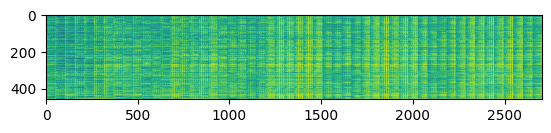

In [6]:
selected_fc = dmfc
n_subjects = selected_fc.shape[0]
n_channels = selected_fc.shape[1]
dmfc = np.nan_to_num(dmfc)
features_2d = dmfc.reshape((n_subjects, n_channels * n_channels))
labels = np.load(
        '/Users/shanxiafeng/Documents/Code/python/fnirs_DL/JinyuanWang_pythonCode/allData/Output_npy/twoDoctor/HbO-All-HC-MDD/label.npy')
plt.imshow(features_2d)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from scipy.stats import t
features_2d = dmfc.reshape((n_subjects, n_channels * n_channels))
X_train, X_test, y_train, y_test = train_test_split(features_2d, labels, test_size=0.2, random_state=42)

# Number of bootstrap samples
n_bootstraps = 1000

# Placeholder for storing coefficients
coefficients = np.zeros((n_bootstraps, X_train.shape[1]))

# Perform bootstrap resampling
for i in range(n_bootstraps):
    # Sample with replacement from X_train and y_train
    X_train, X_test, y_train, y_test = train_test_split(features_2d, labels, test_size=0.2, random_state=i+666)

    # Initialize Ridge regression model with a specific alpha
    ridge_model = Ridge(alpha=2.0)
    
    # Fit the model to the bootstrap sample
    ridge_model.fit(X_train, y_train)
    
    # Store the coefficients
    coefficients[i, :] = ridge_model.coef_

# Calculate the mean and standard deviation of the coefficients
coeff_mean = np.mean(coefficients, axis=0)
coeff_std = np.std(coefficients, axis=0)

# Assuming a normal distribution, calculate the t-statistic for each coefficient
t_stats = coeff_mean / (coeff_std / np.sqrt(n_bootstraps))

# Calculate the p-values
p_values = [2 * (1 - t.cdf(np.abs(t_stat), df=n_bootstraps-1)) for t_stat in t_stats]

# Correct for multiple comparisons, e.g., using Bonferroni correction
p_value_threshold = 0.05 / X_train.shape[1]
significant_features = np.where(np.array(p_values) < p_value_threshold)[0]

# Print significant features
print(f"Significant features after Bonferroni correction: {significant_features}")

Significant features after Bonferroni correction: [   0    1    2 ... 2701 2702 2703]


In [9]:
# Calculate the standard error of each coefficient
standard_errors = coeff_std / np.sqrt(n_bootstraps)

# Get the t-critical value for 95% CI
t_critical = t.ppf(1 - 0.025, df=n_bootstraps-1)  # 0.975 quantile for two-tailed test

# Calculate the 95% CI for each coefficient
ci_lower = coeff_mean - (t_critical * standard_errors)
ci_upper = coeff_mean + (t_critical * standard_errors)

is_cross_zero = np.zeros(coeff_mean.shape)
for i in range(is_cross_zero.shape[0]):
    if 0 >= ci_lower[i] and 0 <= ci_upper[i]:
        is_cross_zero[i] = 1 


In [70]:
# find the highest 10 connectivity (abs) and locate the seed and target channels 

sort_coeff = coeff_mean.copy()
sort_coeff.sort()

min_5 = sort_coeff[:10]
max_5 = sort_coeff[-10:]
highest_10 = min_5.tolist() + max_5.tolist()

ch_number = int(np.sqrt(np.shape(coeff_mean)[0]))
coeff_mean2d = np.reshape(coeff_mean * np.abs(is_cross_zero - 1), (ch_number,ch_number))
ci_lower_2d = np.reshape(ci_lower, (ch_number,ch_number))
ci_upper_2d = np.reshape(ci_upper, (ch_number,ch_number))

highest_connectivity = []
for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in min_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])

for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in max_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])


seed: 0 | target: 12 | weight: -0.06154704898168409 | ci_lower: -0.06523536150016745 | ci_upper: -0.05785873646320072
seed: 0 | target: 3 | weight: -0.06012161752674579 | ci_lower: -0.06395268509072946 | ci_upper: -0.05629054996276212
seed: 2 | target: 43 | weight: -0.07055840271789647 | ci_lower: -0.07317643093081362 | ci_upper: -0.06794037450497932
seed: 7 | target: 21 | weight: -0.06113512853402229 | ci_lower: -0.06468982944390884 | ci_upper: -0.057580427624135726
seed: 50 | target: 51 | weight: -0.05756334957589414 | ci_lower: -0.060312609031377314 | ci_upper: -0.05481409012041096
seed: 0 | target: 6 | weight: 0.061214275618910546 | ci_lower: 0.05787450013693958 | ci_upper: 0.06455405110088151
seed: 1 | target: 36 | weight: 0.05637711129904919 | ci_lower: 0.05332080726415171 | ci_upper: 0.059433415333946665
seed: 8 | target: 44 | weight: 0.05373116525319027 | ci_lower: 0.05109129212705738 | ci_upper: 0.05637103837932316
seed: 8 | target: 18 | weight: 0.062003023102901976 | ci_lower

In [75]:
# find the highest 10 connectivity (abs) and locate the seed and target channels 

sort_coeff = coeff_mean.copy()
sort_coeff.sort()

min_5 = sort_coeff[:10]
max_5 = sort_coeff[-10:]
highest_10 = min_5.tolist() + max_5.tolist()

ch_number = int(np.sqrt(np.shape(coeff_mean)[0]))
coeff_mean2d = np.reshape(coeff_mean * np.abs(is_cross_zero - 1), (ch_number,ch_number))
ci_lower_2d = np.reshape(ci_lower, (ch_number,ch_number))
ci_upper_2d = np.reshape(ci_upper, (ch_number,ch_number))

highest_connectivity = []
for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in min_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])

for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in max_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])


seed: 0 | target: 3 | weight: -0.05965634773439077 | ci_lower: -0.06395268509072946 | ci_upper: -0.05629054996276212
seed: 2 | target: 43 | weight: -0.07079051285924735 | ci_lower: -0.07317643093081362 | ci_upper: -0.06794037450497932
seed: 7 | target: 21 | weight: -0.06345558878928874 | ci_lower: -0.06468982944390884 | ci_upper: -0.057580427624135726
seed: 11 | target: 18 | weight: -0.05784108086219239 | ci_lower: -0.058355052881873974 | ci_upper: -0.052235398732211814
seed: 50 | target: 51 | weight: -0.05827070273644986 | ci_lower: -0.060312609031377314 | ci_upper: -0.05481409012041096
seed: 0 | target: 6 | weight: 0.05779609483988438 | ci_lower: 0.05787450013693958 | ci_upper: 0.06455405110088151
seed: 1 | target: 36 | weight: 0.05379011314336892 | ci_lower: 0.05332080726415171 | ci_upper: 0.059433415333946665
seed: 8 | target: 18 | weight: 0.05825520724155644 | ci_lower: 0.0589396803266453 | ci_upper: 0.06506636587915865
seed: 22 | target: 32 | weight: 0.05789282506061827 | ci_lowe

In [10]:
# find the highest 10 connectivity (abs) and locate the seed and target channels 

sort_coeff = coeff_mean.copy()
sort_coeff.sort()

min_5 = sort_coeff[:10]
max_5 = sort_coeff[-10:]
highest_10 = min_5.tolist() + max_5.tolist()

ch_number = int(np.sqrt(np.shape(coeff_mean)[0]))
coeff_mean2d = np.reshape(coeff_mean * np.abs(is_cross_zero - 1), (ch_number,ch_number))
ci_lower_2d = np.reshape(ci_lower, (ch_number,ch_number))
ci_upper_2d = np.reshape(ci_upper, (ch_number,ch_number))

highest_connectivity = []
for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in min_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])

for seed in range(ch_number):
    for target in range(ch_number-1, seed, -1):
        if coeff_mean2d[seed, target] in max_5:
            print(f'seed: {seed} | target: {target} | weight: {coeff_mean2d[seed, target]} | ci_lower: {ci_lower_2d[seed, target]} | ci_upper: {ci_upper_2d[seed, target]}')
            highest_connectivity.append([seed, target])


seed: 0 | target: 12 | weight: -0.058180516189634164 | ci_lower: -0.05938033766665492 | ci_upper: -0.05698069471261341
seed: 0 | target: 3 | weight: -0.06082902744050764 | ci_lower: -0.06197598099700862 | ci_upper: -0.059682073884006655
seed: 2 | target: 43 | weight: -0.06967530600628291 | ci_lower: -0.07053450065844395 | ci_upper: -0.06881611135412187
seed: 7 | target: 21 | weight: -0.06134700481470245 | ci_lower: -0.062436948223273364 | ci_upper: -0.06025706140613153
seed: 11 | target: 18 | weight: -0.057693650671421 | ci_lower: -0.058701056522835575 | ci_upper: -0.05668624482000643
seed: 0 | target: 6 | weight: 0.05892434832115624 | ci_lower: 0.057815261822802895 | ci_upper: 0.06003343481950959
seed: 1 | target: 36 | weight: 0.054267280502215194 | ci_lower: 0.05335543349360446 | ci_upper: 0.05517912751082593
seed: 8 | target: 18 | weight: 0.05855776578806974 | ci_lower: 0.057566873322211276 | ci_upper: 0.0595486582539282
seed: 22 | target: 32 | weight: 0.055829216800970256 | ci_lowe

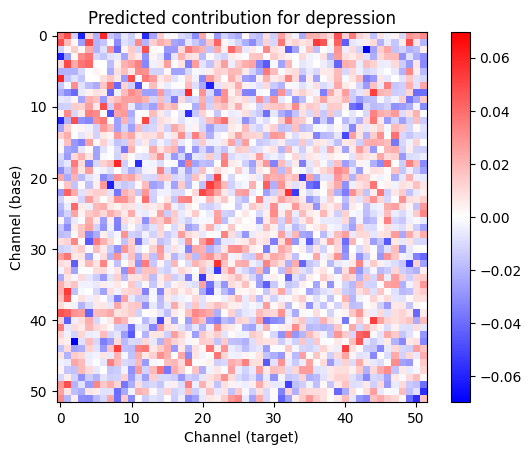

In [11]:
from matplotlib.colors import LinearSegmentedColormap

def imshow_blue_red(data, title, xlabel, ylabel):
    max_val = np.max(np.abs(data))

    # Define the colors for the custom colormap (blue, white, red)
    cmap_colors = [(0, "blue"), (0.5, "white"), (1, "red")]

    # Create the colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

    # Apply the colormap with normalization
    plt.imshow(data, cmap=custom_cmap, vmin=-max_val, vmax=max_val)
    plt.colorbar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


# from analysis import imshow_blue_red
# Assuming coeff_mean2d is your data array
ch_number = int(np.sqrt(np.shape(coeff_mean)[0]))
coeff_mean2d = np.reshape(coeff_mean * np.abs(is_cross_zero - 1), (ch_number,ch_number))

imshow_blue_red(coeff_mean2d, 'Predicted contribution for depression', 'Channel (target)', 'Channel (base)')

In [43]:
x = coeff_mean2d.reshape(-1)
x.sort()
print(x[-10:])

np.max(coeff_mean2d)

[0.05223492 0.05264135 0.05513895 0.05513895 0.05557419 0.05557419
 0.05918234 0.05918234 0.05935781 0.05935781]


0.059357805881406475

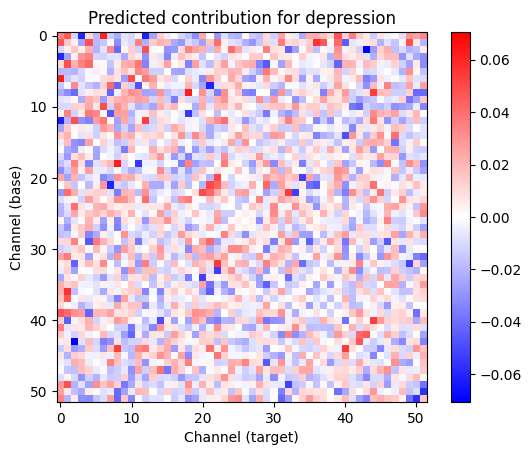

In [13]:
import matplotlib.pyplot as plt
def imshow_blue_red(data, title, xlabel, ylabel):
    max_val = np.max(np.abs(data))

    # Define the colors for the custom colormap (blue, white, red)
    cmap_colors = [(0, "blue"), (0.5, "white"), (1, "red")]

    # Create the colormap
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)

    # Apply the colormap with normalization
    plt.imshow(data, cmap=custom_cmap, vmin=-max_val, vmax=max_val)
    plt.colorbar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

imshow_blue_red(coeff_mean2d, 'Predicted contribution for depression', 'Channel (target)', 'Channel (base)')

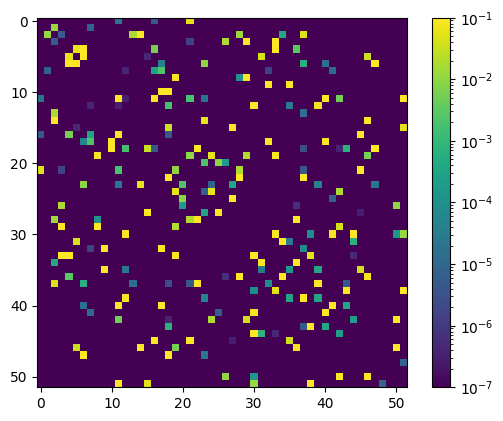

[1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.93323591e-05
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 4.30304155e-06 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 5.25246059e-02 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07 1.00000000e-07]


In [38]:
import matplotlib.colors as mcolors
p_correct_value = np.array(p_values)

min_p = 1e-7
p_correct_value[p_correct_value < min_p] = min_p
p_2d = np.reshape(p_correct_value, (ch_number, ch_number))
# Create a LogNorm object with the desired scale.
log_norm = mcolors.LogNorm(vmin=min_p, vmax=0.1)

plt.imshow(p_2d, norm=log_norm)
plt.colorbar()
plt.show()
print(p_2d[0])

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_2d, labels, test_size=0.2, random_state=42)

# Train the original model on the real training set and evaluate on the test set
original_model = Ridge(alpha=2.0)
original_model.fit(X_train, y_train)
original_mse = mean_squared_error(y_test, original_model.predict(X_test))

# Perform permutation testing
n_bootstraps = 1000
n_better_or_equal = 0

for i in range(n_bootstraps):
    # Permute the labels of the training set
    y_train_permuted = resample(y_train)
    
    # Train the model on the permuted data
    model_permuted = Ridge(alpha=2.0)
    model_permuted.fit(X_train, y_train_permuted)
    
    # Evaluate the model on the original test set
    mse_permuted = mean_squared_error(y_test, model_permuted.predict(X_test))
    
    # Compare the MSE of the permuted model with the original model
    if mse_permuted <= original_mse:
        n_better_or_equal += 1

# Calculate the p-value as the proportion of permutations where permuted MSE is better or equal to original MSE
p_value = n_better_or_equal / n_bootstraps

# Print the p-value
print(f"p-value from permutation test: {p_value}")

p-value from permutation test: 0.67
